In [64]:
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import dash

from IPython.display import clear_output
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

# Data Set Loading for Visualisation
Our World In Data look for the link with .org

In [65]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [66]:
df_country_info=pd.read_csv(url,sep=',')

In [67]:
df_country_info.columns
df_country_info.head()
#df_country_info.to_csv('covid_full_data.csv', ';')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [68]:
country_list = [
    'AUS',
    'USA',
    'ESP',
    'IND',
    'CHN',
    'DEU',
    'AFG'
]

In [69]:
df_country=pd.DataFrame()
for each in country_list:
    df_country_info['iso_code'].unique()  
    df_country_info['iso_code']==each
    df_country = pd.concat([df_country, df_country_info[df_country_info['iso_code']==each]], sort=False)
    df_country = df_country.reset_index(drop=True)

df_country.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,-47.0,-0.4,2.8,-1.813195
1,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
2,AUS,Oceania,Australia,2020-01-28,5.0,0.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
3,AUS,Oceania,Australia,2020-01-29,6.0,1.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN
4,AUS,Oceania,Australia,2020-01-30,9.0,3.0,NaN,NaN,NaN,NaN,...,13.0,16.5,NaN,3.84,83.44,0.944,NaN,NaN,NaN,NaN


In [70]:
df_country_info['location'].unique()
df_country_info['location']=='Germany'
df_GER=df_country_info[df_country_info['location']=='Germany']
df_GER.reset_index(drop=True)
df_GER['date']=pd.to_datetime(df_GER['date'],format='%Y-%m-%d')
df_GER=df_GER.drop(df_GER.iloc[:, :3],axis = 1).drop(df_GER.iloc[:, 4:],axis = 1)

<ipython-input-70-6f3f557a590f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:

for each in country_list:
    df_country_info['iso_code'].unique()  
    df_info = df_country_info[df_country_info['iso_code']==each]
    df_data=df_info.drop(df_info.iloc[:, :3],axis = 1).drop(df_info.iloc[:, 5:],axis = 1).rename(columns={'total_cases': 'total_cases_'+each})
    df_data['date']=pd.to_datetime(df_data['date'],format='%Y-%m-%d') 
    df_GER = df_GER.join(df_data.set_index('date'), on='date')
    df_GER = df_GER.reset_index(drop=True)


df_GER

,date,total_cases_AUS,total_cases_USA,total_cases_ESP,total_cases_IND,total_cases_CHN,total_cases_DEU,total_cases_AFG
0,2020-01-27,5.0,5.0,NaN,NaN,2863.0,1.0,NaN
1,2020-01-28,5.0,5.0,NaN,NaN,5494.0,4.0,NaN
2,2020-01-29,6.0,6.0,NaN,NaN,6070.0,4.0,NaN
3,2020-01-30,9.0,6.0,NaN,1.0,8124.0,4.0,NaN
4,2020-01-31,9.0,8.0,NaN,1.0,9783.0,5.0,NaN
...,...,...,...,...,...,...,...,...
898,2022-07-13,8653081.0,89149141.0,13032841.0,43689989.0,893814.0,29460249.0,183285.0
899,2022-07-14,8691850.0,89294234.0,13032841.0,43710027.0,894156.0,29569943.0,183358.0
900,2022-07-15,8734573.0,89453076.0,13090476.0,43730071.0,894689.0,29692989.0,183407.0
901,2022-07-16,8773487.0,89521016.0,13090476.0,43750599.0,895236.0,29692989.0,183445.0


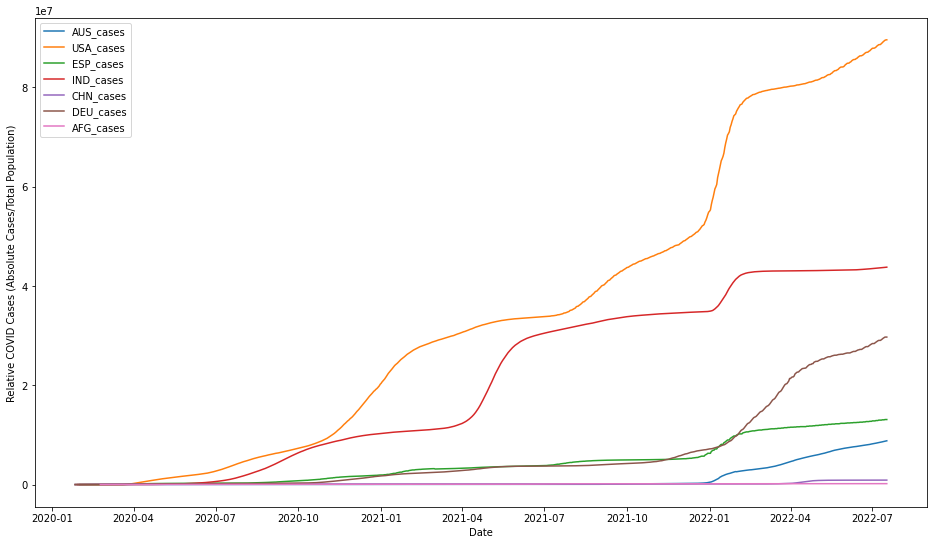

In [72]:
# Defining the size for plotting 
fig = plt.figure(figsize=(16,9))
for each in country_list:
    clear_output(wait=True)
    plt.plot(df_GER.date, df_GER['total_cases_'+each], label = each+"_cases")
    
# Add X-label for date
plt.xlabel('Date')
# Add Y-label for relative covid cases 
plt.ylabel('Relative COVID Cases (Absolute Cases/Total Population)')
# Add legend
plt.legend()
# Display Plot
plt.show()

In [73]:
import plotly.graph_objects as go

In [74]:
import plotly
plotly.__version__

'5.8.2'

In [75]:
# fig = go.Figure()
# for each in country_list:
#     fig.add_trace(
#         go.Scatter(x=df_GER.date,
#                    y=df_GER['total_cases_'+each],
#                    mode='markers+lines',
#                    opacity=0.9,
#                    line_width=2,
#                    marker_size=1,
#                    name=each))
# fig.update_layout(
#     width=1600,
#     height=1200,
#     xaxis_title='Time',
#     yaxis_title=
#     'Confirmed infected people (source johns hopkins database, log = scale)')

# fig.update_yaxes(type='linear', range=[1.1, 5.5])

# fig.update_layout(xaxis_rangeslider_visible=True)
# # fig.show(renderer = 'chrome')
# fig.show()

# Dashboard Creation

In [76]:
app = dash.Dash()
app.layout = html.Div([
    html.Label('Multi-Select Country'),
    dcc.Dropdown(id='country_drop_down',
                 options=[{
                     'label': 'Australia',
                     'value': 'AUS'
                 }, {
                     'label': 'USA',
                     'value': 'USA'
                 }, {
                     'label': 'Spain',
                     'value': 'ESP'
                 }, {
                     'label': 'India',
                     'value': 'IND'
                 }, {
                     'label': 'China',
                     'value': 'CHN'
                 }, {
                     'label': 'Germany',
                     'value': 'DEU'
                 }],
                 
                 value=['USA', 'IND'],
                 multi=True),
    dcc.Graph(figure=fig, id='main_window_slope')
])

In [77]:
@app.callback(Output('main_window_slope', 'figure'),
              [Input('country_drop_down', 'value')])
def update_figure(country_list):

    traces = []
    for each in country_list:
        traces.append(
            dict(x=df_GER.date,
                 y=df_GER['total_cases_'+each],
                 mode='markers+lines',
                 opacity=0.9,
                 line_width=2,
                 marker_size=1,
                 name=each))

    return {
        'data':
        traces,
        'layout':
        dict(
            width=1280,
            height=720,
            xaxis_title='Time',
            yaxis_title=
            'Confirmed infected people (source johns hopkins case, log-scale)',
            xaxis={
                'tickangle': -45,
                'nticks': 20,
                'tickfont': dict(size=14, color='#7f7f7f'),
            },
            yaxis={
                'type': 'linear',
                'range': '[1.1, 5.5]'
            })
    }

In [78]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
